<a href="https://colab.research.google.com/github/SLKS99/Exploring-the-Evolution-of-Metal-Halide-Perovskites-via-Latent-Representations-of-the-Photoluminesce/blob/main/VAE_Dummy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nov 28, 2022


Contributions:
- Data by Mahshid Ahmadi and Sheryl Sanchez
- Detailed analyses by Sheryl Sanchez

- AtomAI and PyroVED by Maxim Ziatdinov
- Workflow by Sergei Kalinin

Funding:
- MZ and SVK: CNMS


**Notebook Package Version**
- torch version: 1.8.0+cu101; 
- matplotlib: 3.2.2
- pyroved: 0.2.3
- sklearn: 0.22.2.post1
- numpy: 1.19.5
- pyUSID: 0.0.10



In [1]:
pip install pyroved==0.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 274 kB/s 
     |████████████████████████████████| 727 kB 39.7 MB/s 


In [3]:
!pip install atomai pyroved

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 37.4 MB/s 
     |████████████████████████████████| 245 kB 69.1 MB/s 
     |████████████████████████████████| 193 kB 79.8 MB/s 
     |████████████████████████████████| 155 kB 72.3 MB/s 
     |████████████████████████████████| 865 kB 71.3 MB/s 
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174981 sha256=adb548e69b7348fab42bfe2c8f527ee794b72f94f492f7c00e7b2c5904c8c7ce
  Stored in directory: /root/.cache/pip/wheels/8c/7c/e3/8527b988323eb2482cb927b046ae8efcf4adf49dc5a91f7f91
Successfully built mendeleev


In [31]:
import pyroved as pv
import torch
import matplotlib.pyplot as plt


import numpy as np



import math


import seaborn as sns


import random
import pyroved as pv

import atomai as aoi

A family of Guassian curves were generated to have Random mu (Peak Position) and sigma (width). This allows us to see how VAE may understand given data. 


## Random Mu and Sig

In [5]:
x= torch.linspace(-10,10,100) # The x axis is being varied -10 to 10

def gaussian(x,mu, sig):
    return torch.exp(-torch.pow(x - mu, 2.) / (2 * torch.pow(sig, 2.)))


def gauss_rand_mu_sig(samples:int=5000)-> torch.Tensor: # I have the code generate 5000 random samples
  a=torch.tensor(1)
  dataset=[]
  mu_rand=[]
  sig_rand=[]

  for _ in range(samples):
    
    mu=torch.randint(-50,50,(1,))/10 #Using -50,50, but this number can be changed to see what happens with different mu
    sig= torch.randint(80,200,(1,))/1e2 #likewisde The number 80,200 can also be varied
    g= a*gaussian(x,mu,sig)
    dataset.append(g[None,...])
    mu_rand.append(mu)
    sig_rand.append(sig)
  dataset = torch.cat(dataset)
  dataset = (dataset - dataset.min())/(dataset.max() - dataset.min()) #dataset is normalized here
    

    
    
  return dataset, mu_rand,sig_rand

In [6]:


train_data_with_rand_mu_sig,mu_rand,sig_rand = gauss_rand_mu_sig()

In [7]:

train_data_with_rand_mu_sig #This is the results of the generated data

tensor([[7.1390e-05, 1.4776e-04, 2.9713e-04,  ..., 1.6630e-32, 2.1024e-33,
         2.5824e-34],
        [2.2111e-03, 3.3845e-03, 5.1017e-03,  ..., 1.6528e-16, 5.7017e-17,
         1.9370e-17],
        [1.4184e-16, 4.4086e-16, 1.3459e-15,  ..., 5.3705e-05, 2.9409e-05,
         1.5818e-05],
        ...,
        [5.4816e-10, 1.3323e-09, 3.1773e-09,  ..., 9.1032e-11, 3.5419e-11,
         1.3523e-11],
        [6.7439e-34, 1.0868e-32, 1.6633e-31,  ..., 5.5407e-21, 6.0291e-22,
         6.2311e-23],
        [6.0162e-17, 2.0722e-16, 6.9906e-16,  ..., 5.9540e-07, 2.7211e-07,
         1.2180e-07]])

In [8]:
# Initialize dataloader
train_loader = pv.utils.init_dataloader(train_data_with_rand_mu_sig.unsqueeze(1), batch_size=64)     

Text(0.5, 0.98, 'Train Data with Random μ& δ')

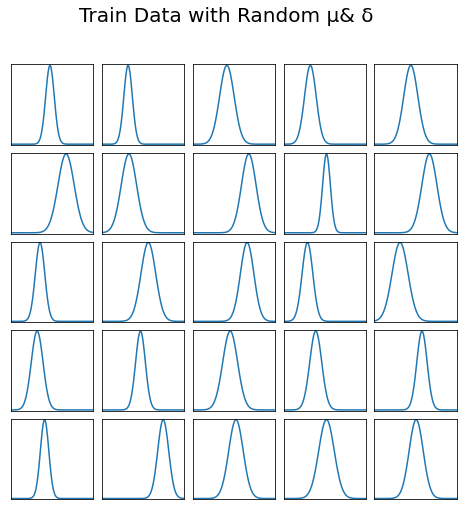

In [9]:
#show spectra
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

x= torch.linspace(-10,10,100)
for ax, (y,) in zip(axes.flat, train_loader):
    ax.plot(x, y[0, 0])
    ax.set_ylim (-0.01,1.01)
    ax.set_xlim(-10,10)

fig.suptitle('Train Data with Random μ& δ', fontsize = 20  )

## VAE

In [10]:
# set the dimension of the spectra
in_dim = (100,)

# Initialize invariant VAE
vae = pv.models.iVAE(in_dim, latent_dim=2, invariances= None, sampler_d='gaussian', decoder_sig=0.01, seed=42) #['t']

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(50):
    trainer.step(train_loader,scale_factor=1)
    trainer.print_statistics()

Epoch: 1 Training loss: 30696.1643
Epoch: 2 Training loss: 5352.6635
Epoch: 3 Training loss: 2757.9076
Epoch: 4 Training loss: 1702.0351
Epoch: 5 Training loss: 1065.5229
Epoch: 6 Training loss: 640.9444
Epoch: 7 Training loss: 366.9110
Epoch: 8 Training loss: 193.4603
Epoch: 9 Training loss: 75.3748
Epoch: 10 Training loss: -2.4125
Epoch: 11 Training loss: -59.4894
Epoch: 12 Training loss: -101.1246
Epoch: 13 Training loss: -133.5406
Epoch: 14 Training loss: -156.0064
Epoch: 15 Training loss: -176.6059
Epoch: 16 Training loss: -193.2356
Epoch: 17 Training loss: -204.3371
Epoch: 18 Training loss: -218.7760
Epoch: 19 Training loss: -227.7605
Epoch: 20 Training loss: -232.6784
Epoch: 21 Training loss: -242.9046
Epoch: 22 Training loss: -250.0353
Epoch: 23 Training loss: -256.6561
Epoch: 24 Training loss: -261.0406
Epoch: 25 Training loss: -264.0504
Epoch: 26 Training loss: -263.4662
Epoch: 27 Training loss: -268.6219
Epoch: 28 Training loss: -280.5688
Epoch: 29 Training loss: -281.9865
E

plot two latent variables as 2D distribution and colored by the ground truth, either mu_rand or  sig_rand

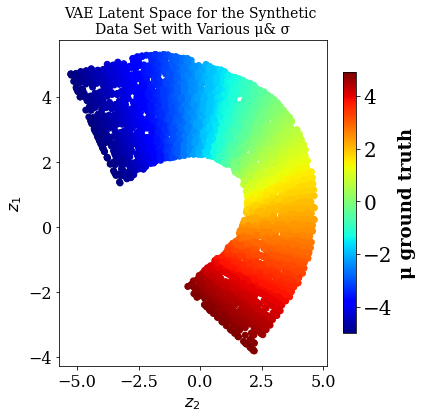

In [19]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
z_mean, z_sd = vae.encode(train_data_with_rand_mu_sig)

mu_rand,sig_rand

fig, (ax1)= plt.subplots (1,figsize=(6,6))
im1= ax1.scatter(z_mean[:, -1], z_mean[:, -2], c=mu_rand, cmap='jet')

ax1.set_xlabel("$z_2$", fontsize=16)
ax1.set_ylabel("$z_1$", fontsize=16)

ax1.tick_params(axis='both',labelsize=16)


ax1.set_title('VAE Latent Space for the Synthetic \nData Set with Various μ& σ', fontsize = 14)

cbar1 = fig.colorbar(im1, ax=ax1, shrink=.8)
ax1 = fig.add_axes([.68, .12, .30, .76])

plt.gca().set_visible(False)

cbar1.set_label('μ ground truth', fontsize=18, labelpad=5)
plt.show()




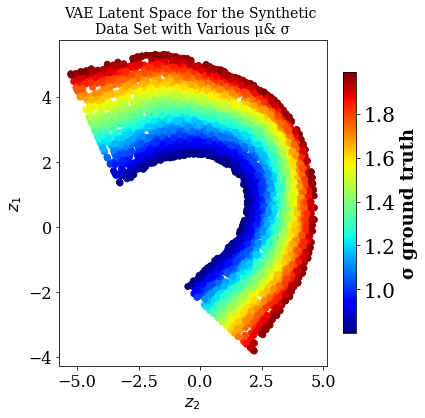

In [20]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
z_mean, z_sd = vae.encode(train_data_with_rand_mu_sig)

mu_rand,sig_rand

fig, (ax1)= plt.subplots (1,figsize=(6,6))
im1= ax1.scatter(z_mean[:, -1], z_mean[:, -2], c=sig_rand, cmap='jet')

ax1.set_xlabel("$z_2$", fontsize=16)
ax1.set_ylabel("$z_1$", fontsize=16)

ax1.tick_params(axis='both',labelsize=16)


ax1.set_title('VAE Latent Space for the Synthetic \nData Set with Various μ& σ', fontsize = 14)

cbar1 = fig.colorbar(im1, ax=ax1, shrink=.8)
ax1 = fig.add_axes([.68, .12, .30, .76])

plt.gca().set_visible(False)

cbar1.set_label('σ ground truth', fontsize=18, labelpad=5)
plt.show()




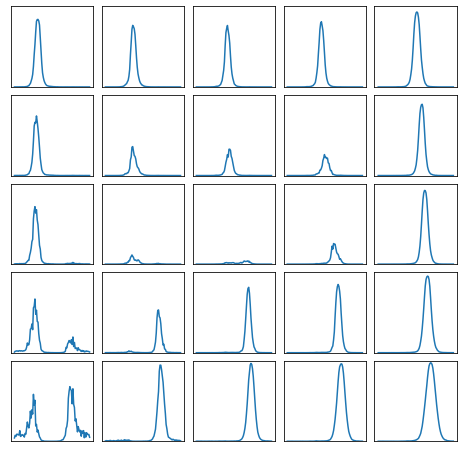

In [24]:
vae.manifold2d(d=5, ylim = [0,1]);

## tVAE

In [25]:
# set the dimension of the spectra
in_dim = (100,)

# Initialize invariant VAE
vae = pv.models.iVAE(in_dim, latent_dim=2, invariances= ['t'], sampler_d='gaussian', decoder_sig=0.01, seed=42) #['t']

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(50):
    trainer.step(train_loader,scale_factor=1)
    trainer.print_statistics()

Epoch: 1 Training loss: 44129.9962
Epoch: 2 Training loss: 7189.6119
Epoch: 3 Training loss: 857.8822
Epoch: 4 Training loss: 539.4894
Epoch: 5 Training loss: 276.4961
Epoch: 6 Training loss: 71.0443
Epoch: 7 Training loss: -55.0858
Epoch: 8 Training loss: -89.9138
Epoch: 9 Training loss: -63.6172
Epoch: 10 Training loss: -182.4162
Epoch: 11 Training loss: -199.8663
Epoch: 12 Training loss: -172.0450
Epoch: 13 Training loss: -218.3620
Epoch: 14 Training loss: -119.4020
Epoch: 15 Training loss: -245.9191
Epoch: 16 Training loss: -245.5672
Epoch: 17 Training loss: -220.9814
Epoch: 18 Training loss: -17.4382
Epoch: 19 Training loss: -265.4057
Epoch: 20 Training loss: -274.5717
Epoch: 21 Training loss: -275.1785
Epoch: 22 Training loss: -272.0240
Epoch: 23 Training loss: -276.1042
Epoch: 24 Training loss: -281.6313
Epoch: 25 Training loss: -278.3215
Epoch: 26 Training loss: -267.4432
Epoch: 27 Training loss: -224.0392
Epoch: 28 Training loss: -223.8466
Epoch: 29 Training loss: -289.9467
Ep

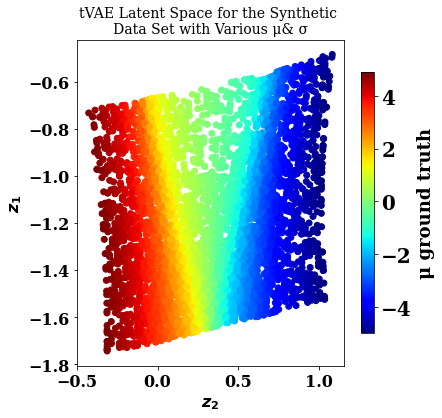

In [27]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
z_mean, z_sd = vae.encode(train_data_with_rand_mu_sig)

mu_rand,sig_rand

fig, (ax1)= plt.subplots (1,figsize=(6,6))
im1= ax1.scatter(z_mean[:, -1], z_mean[:, -2], c=mu_rand, cmap='jet')

ax1.set_xlabel("$z_2$", fontsize=16)
ax1.set_ylabel("$z_1$", fontsize=16)

ax1.tick_params(axis='both',labelsize=16)


ax1.set_title('tVAE Latent Space for the Synthetic \nData Set with Various μ& σ', fontsize = 14)

cbar1 = fig.colorbar(im1, ax=ax1, shrink=.8)
ax1 = fig.add_axes([.68, .12, .30, .76])

plt.gca().set_visible(False)

cbar1.set_label('μ ground truth', fontsize=18, labelpad=5)
plt.show()




/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:4211: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  c = np.asanyarray(c, dtype=float)


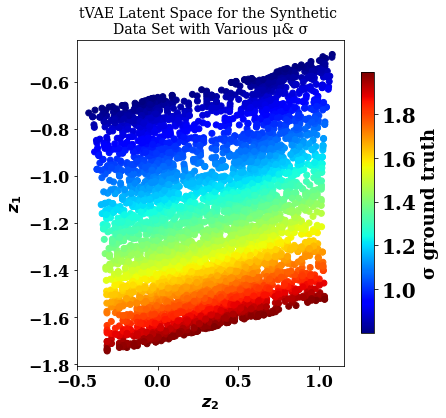

In [28]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
z_mean, z_sd = vae.encode(train_data_with_rand_mu_sig)

mu_rand,sig_rand

fig, (ax1)= plt.subplots (1,figsize=(6,6))
im1= ax1.scatter(z_mean[:, -1], z_mean[:, -2], c=sig_rand, cmap='jet')

ax1.set_xlabel("$z_2$", fontsize=16)
ax1.set_ylabel("$z_1$", fontsize=16)

ax1.tick_params(axis='both',labelsize=16)


ax1.set_title('tVAE Latent Space for the Synthetic \nData Set with Various μ& σ', fontsize = 14)

cbar1 = fig.colorbar(im1, ax=ax1, shrink=.8)
ax1 = fig.add_axes([.68, .12, .30, .76])

plt.gca().set_visible(False)

cbar1.set_label('σ ground truth', fontsize=18, labelpad=5)
plt.show()




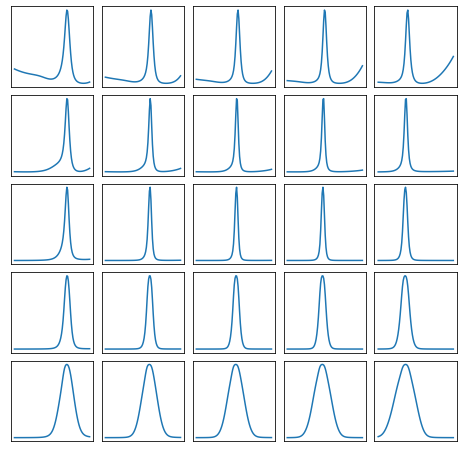

In [30]:
vae.manifold2d(d=5);